In [1]:
#IMPORTANTO AS BIBLIOTECAS
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

In [2]:
df=pd.read_csv("updata_dataset.csv")
df

,step_count,mood,calories_burned,hours_of_sleep,bool_of_active,weight_kg
0,5464,200,181,5,0,66
1,6041,100,197,8,0,66
2,25,100,0,5,0,66
3,5461,100,174,4,0,66
4,6915,200,223,5,500,66
...,...,...,...,...,...,...
91,133,100,4,2,0,64
92,153,300,0,8,0,64
93,500,200,0,5,500,64
94,2127,200,0,5,0,64


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 6 columns):
step_count         96 non-null int64
mood               96 non-null int64
calories_burned    96 non-null int64
hours_of_sleep     96 non-null int64
bool_of_active     96 non-null int64
weight_kg          96 non-null int64
dtypes: int64(6)
memory usage: 4.6 KB


In [4]:
df.describe()

,step_count,mood,calories_burned,hours_of_sleep,bool_of_active,weight_kg
count,96.000000,96.000000,96.000000,96.00000,96.000000,96.000000
mean,2935.937500,211.458333,93.447917,5.21875,218.750000,64.281250
std,2143.384573,84.442184,71.601951,1.51625,249.341237,0.627495
min,25.000000,100.000000,0.000000,2.00000,0.000000,64.000000
25%,741.000000,100.000000,21.750000,4.00000,0.000000,64.000000
50%,2987.500000,200.000000,96.000000,5.00000,0.000000,64.000000
75%,4546.250000,300.000000,149.250000,6.00000,500.000000,64.000000
max,7422.000000,300.000000,243.000000,9.00000,500.000000,66.000000


In [5]:
df.corr()

,step_count,mood,calories_burned,hours_of_sleep,bool_of_active,weight_kg
step_count,1.000000,0.246738,0.989260,0.080687,0.120212,0.109404
mood,0.246738,1.000000,0.235044,0.210417,0.379646,-0.458776
calories_burned,0.989260,0.235044,1.000000,0.080726,0.110900,0.112200
hours_of_sleep,0.080687,0.210417,0.080726,1.000000,0.136603,0.189118
bool_of_active,0.120212,0.379646,0.110900,0.136603,1.000000,-0.296443
weight_kg,0.109404,-0.458776,0.112200,0.189118,-0.296443,1.000000


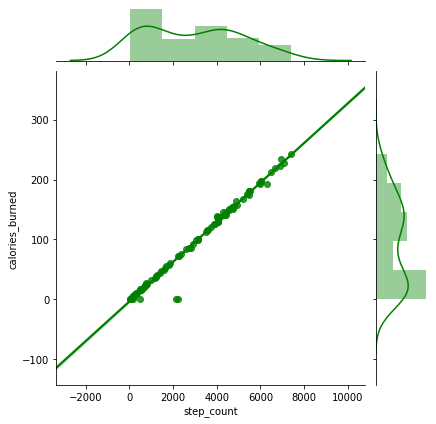

In [6]:
Correlacao= df[['step_count','calories_burned','hours_of_sleep','weight_kg', 'mood', 'bool_of_active']]
Correlacao
sns.jointplot(data=Correlacao,y='calories_burned',x='step_count',kind='reg', color='g')

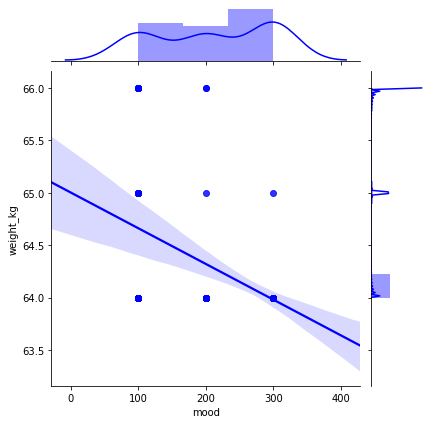

In [7]:
sns.jointplot(data=Correlacao,y='weight_kg',x='mood',kind='reg', color='b')

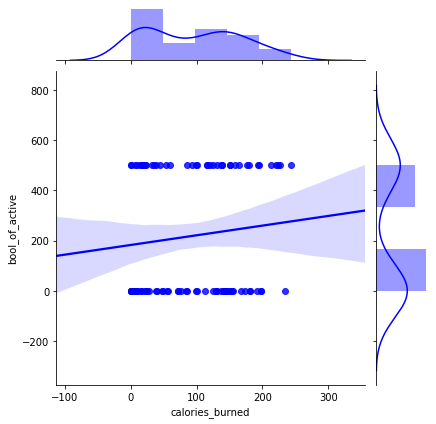

In [8]:
sns.jointplot(data=Correlacao,y='bool_of_active',x='calories_burned',kind='reg', color='b')

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import metrics
import statistics 
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [22]:

feature_cols = ['step_count','calories_burned','hours_of_sleep','weight_kg', 'mood']
X = df[feature_cols] # Features
y = df.bool_of_active # Target variable
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.50,random_state=42)



# LogisticRegression

In [23]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)


from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

train=logreg.score(X_train,y_train)
test=logreg.score(X_test,y_test)
print("train error: ",(1-train))
print ("test error: ",(1-test)) 
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#print("Precision:",metrics.precision_score(y_test, y_pred))
#print("Recall:",metrics.recall_score(y_test, y_pred))






[[17 15]
 [ 2 14]]
[[17 15]
 [ 2 14]]
              precision    recall  f1-score   support

           0       0.89      0.53      0.67        32
         500       0.48      0.88      0.62        16

    accuracy                           0.65        48
   macro avg       0.69      0.70      0.64        48
weighted avg       0.76      0.65      0.65        48

train error:  0.35416666666666663
test error:  0.35416666666666663
Accuracy: 0.6458333333333334


/Users/shaikha/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [24]:
zip(feature_cols,logreg.coef_)
print(feature_cols)
print(logreg.intercept_)
print(logreg.coef_)


['step_count', 'calories_burned', 'hours_of_sleep', 'weight_kg', 'mood']
[0.0034993]
[[ 0.00159292 -0.04559168 -0.02846278 -0.02974817  0.00866917]]


In [25]:
def ROC(y_test, y_prob):
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_prob)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    plt.figure(figsize = (10,10))
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, color = 'red', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1], linestyle = '--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

In [26]:
ROC(y_test, y_pred)

ValueError: Data is not binary and pos_label is not specified

NameError: name 'ax' is not defined

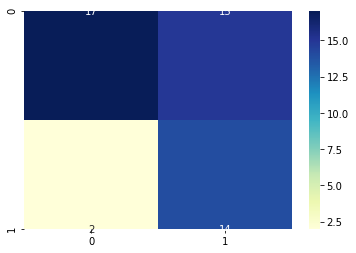

In [27]:


# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# SVC classifier

In [28]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)
y_pred2 = svclassifier.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))


train=svclassifier.score(X_train,y_train)
test=svclassifier.score(X_test,y_test)
print("train error: ",(1-train))
print ("test error: ",(1-test)) 
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))
print("Precision:",metrics.precision_score(y_test, y_pred2))
print("Recall:",metrics.recall_score(y_test, y_pred2))



[[17 15]
 [ 1 15]]
              precision    recall  f1-score   support

           0       0.94      0.53      0.68        32
         500       0.50      0.94      0.65        16

    accuracy                           0.67        48
   macro avg       0.72      0.73      0.67        48
weighted avg       0.80      0.67      0.67        48

train error:  0.3125
test error:  0.33333333333333337
Accuracy: 0.6666666666666666


ValueError: pos_label=1 is not a valid label: array([  0, 500])

In [ ]:
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
#kernel SVM using polynomial kernel looks like this:
#from sklearn.svm import SVC
#svclassifier = SVC(kernel='poly', degree=8)
#svclassifier.fit(X_train, y_train)
#y_pred = svclassifier.predict(X_test)

#from sklearn.metrics import classification_report, confusion_matrix
#print(confusion_matrix(y_test, y_pred))
#print(classification_report(y_test, y_pred))

#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))





In [29]:
from sklearn.model_selection import GridSearchCV 

parameters = {'kernel':('linear', 'rbf'), 'C':[1,2,3,4,5,6,7,8,9,10], 'gamma': 
              [0.01,0.02,0.03,0.04,0.05,0.10,0.2,0.3,0.4,0.5]}
svr = svm.SVC()
grid = GridSearchCV(svr, parameters)
grid.fit(X_train, y_train)
predicted = grid.predict(X_test)
cnf_matrix = confusion_matrix(y_test, predicted)

NameError: name 'svm' is not defined